In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amitshuklaa18","key":"965962e6dcd94f27d1c904e6e4eeae68"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!unzip /content/new-plant-diseases-dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[180.25 172.25 183.25]
   [171.75 163.75 174.75]
   [177.75 169.75 180.75]
   ...
   [159.5  151.5  162.5 ]
   [139.25 131.25 142.25]
   [156.75 148.75 159.75]]

  [[178.75 170.75 181.75]
   [175.25 167.25 178.25]
   [177.25 169.25 180.25]
   ...
   [163.   155.   166.  ]
   [159.5  151.5  162.5 ]
   [136.   128.   139.  ]]

  [[174.25 166.25 177.25]
   [172.25 164.25 175.25]
   [169.   161.   172.  ]
   ...
   [129.25 121.25 132.25]
   [162.75 154.75 165.75]
   [145.   137.   148.  ]]

  ...

  [[205.75 200.75 206.75]
   [204.75 199.75 205.75]
   [208.5  203.5  209.5 ]
   ...
   [181.75 174.75 181.75]
   [200.5  193.5  200.5 ]
   [185.25 178.25 185.25]]

  [[204.5  199.5  205.5 ]
   [203.25 198.25 204.25]
   [209.   204.   210.  ]
   ...
   [177.5  170.5  177.5 ]
   [178.   171.   178.  ]
   [181.75 174.75 181.75]]

  [[204.5  199.5  205.5 ]
   [203.75 198.75 204.75]
   [199.25 194.25 200.25]
   ...
   [193.75 186.75 193.75]
   [178.25 171.25 178.25]
   [191.   184.   19

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [ ]:
!pip install tf_keras


In [ ]:
import os
#os.environ['TF_USE_LEGACY_KERAS'] = 'True' # Commented out to avoid legacy keras
# Import tensorflow and ensure tf_keras is used
import tensorflow as tf
#import tf_keras # No need for tf_keras explicitly

# Now use tf.keras.optimizers.Adam
# removed 'legacy' and using the standard tf.keras.optimizers
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 165s 68ms/step - accuracy: 0.3595 - loss: 2.2882 - val_accuracy: 0.8400 - val_loss: 0.5031
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 189s 67ms/step - accuracy: 0.8218 - loss: 0.5643 - val_accuracy: 0.9030 - val_loss: 0.2975
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 67ms/step - accuracy: 0.9000 - loss: 0.3127 - val_accuracy: 0.9228 - val_loss: 0.2424
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 67ms/step - accuracy: 0.9320 - loss: 0.2095 - val_accuracy: 0.9408 - val_loss: 0.1912
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 62ms/step - accuracy: 0.9497 - loss: 0.1513 - val_accuracy: 0.9536 - val_loss: 0.1496
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9610 - loss: 0.1205 - val_accuracy: 0.9388 - val_loss: 0.1976
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.9694 - loss: 0.0923 - val_accuracy: 0.9443 - val_loss: 0.1721
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.9931 - loss: 0.0248


In [ ]:
print(train_loss,train_acc)

0.022254467010498047 0.9939113855361938


In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.5684472322463989,
  0.8473575711250305,
  0.9097659587860107,
  0.9376200437545776,
  0.9540650248527527,
  0.9630272388458252,
  0.970339298248291,
  0.9756739735603333,
  0.9799559116363525,
  0.9805249571800232],
 'loss': [1.4742732048034668,
  0.47900328040122986,
  0.2786594331264496,
  0.19285495579242706,
  0.1395871937274933,
  0.11431997269392014,
  0.08855018019676208,
  0.07572180032730103,
  0.06306328624486923,
  0.058586955070495605],
 'val_accuracy': [0.8400295972824097,
  0.9030275344848633,
  0.9227748513221741,
  0.9408149123191833,
  0.9535624980926514,
  0.9387662410736084,
  0.9442863464355469,
  0.9573184847831726,
  0.9674482345581055,
  0.9714318513870239],
 'val_loss': [0.5030542016029358,
  0.29751142859458923,
  0.24239696562290192,
  0.1911555677652359,
  0.1495611071586609,
  0.19755205512046814,
  0.1721094399690628,
  0.144563227891922,
  0.1083948165178299,
  0.09913723915815353]}

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.8400295972824097,
 0.9030275344848633,
 0.9227748513221741,
 0.9408149123191833,
 0.9535624980926514,
 0.9387662410736084,
 0.9442863464355469,
 0.9573184847831726,
 0.9674482345581055,
 0.9714318513870239]

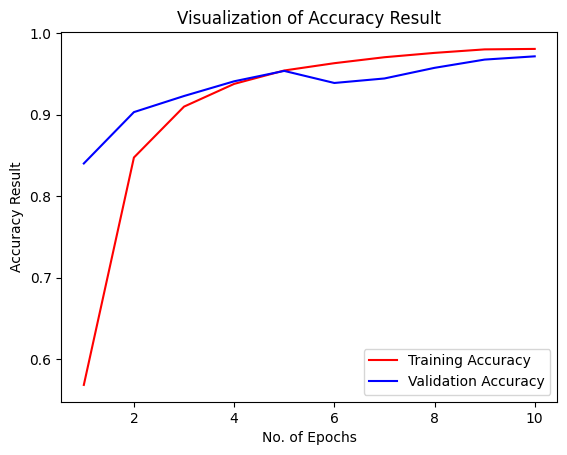

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


(array([[9.9993813e-01, 1.9538806e-05, 5.0305550e-07, ..., 6.4105995e-12,
         6.7778883e-10, 2.0643229e-09],
        [9.9999893e-01, 1.6487851e-08, 1.8379604e-08, ..., 1.6870067e-15,
         4.6784607e-12, 8.0933749e-12],
        [9.9999952e-01, 6.6731346e-08, 1.8099232e-07, ..., 1.4972632e-14,
         1.9703148e-12, 1.9806456e-09],
        ...,
        [7.2095773e-08, 1.4541806e-09, 3.8416706e-06, ..., 5.3249504e-08,
         3.9502570e-09, 9.9993539e-01],
        [1.4999692e-08, 2.1869737e-10, 6.0779786e-07, ..., 2.2827726e-07,
         5.2209450e-09, 9.9997675e-01],
        [7.6757733e-14, 5.6125081e-16, 8.8389279e-13, ..., 1.1118804e-14,
         2.4138721e-13, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.95       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.90      0.98      0.94       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[463,   2,   0, ...,   0,   0,   0],
       [  0, 490,   0, ...,   0,   0,   0],
       [  0,   0, 433, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

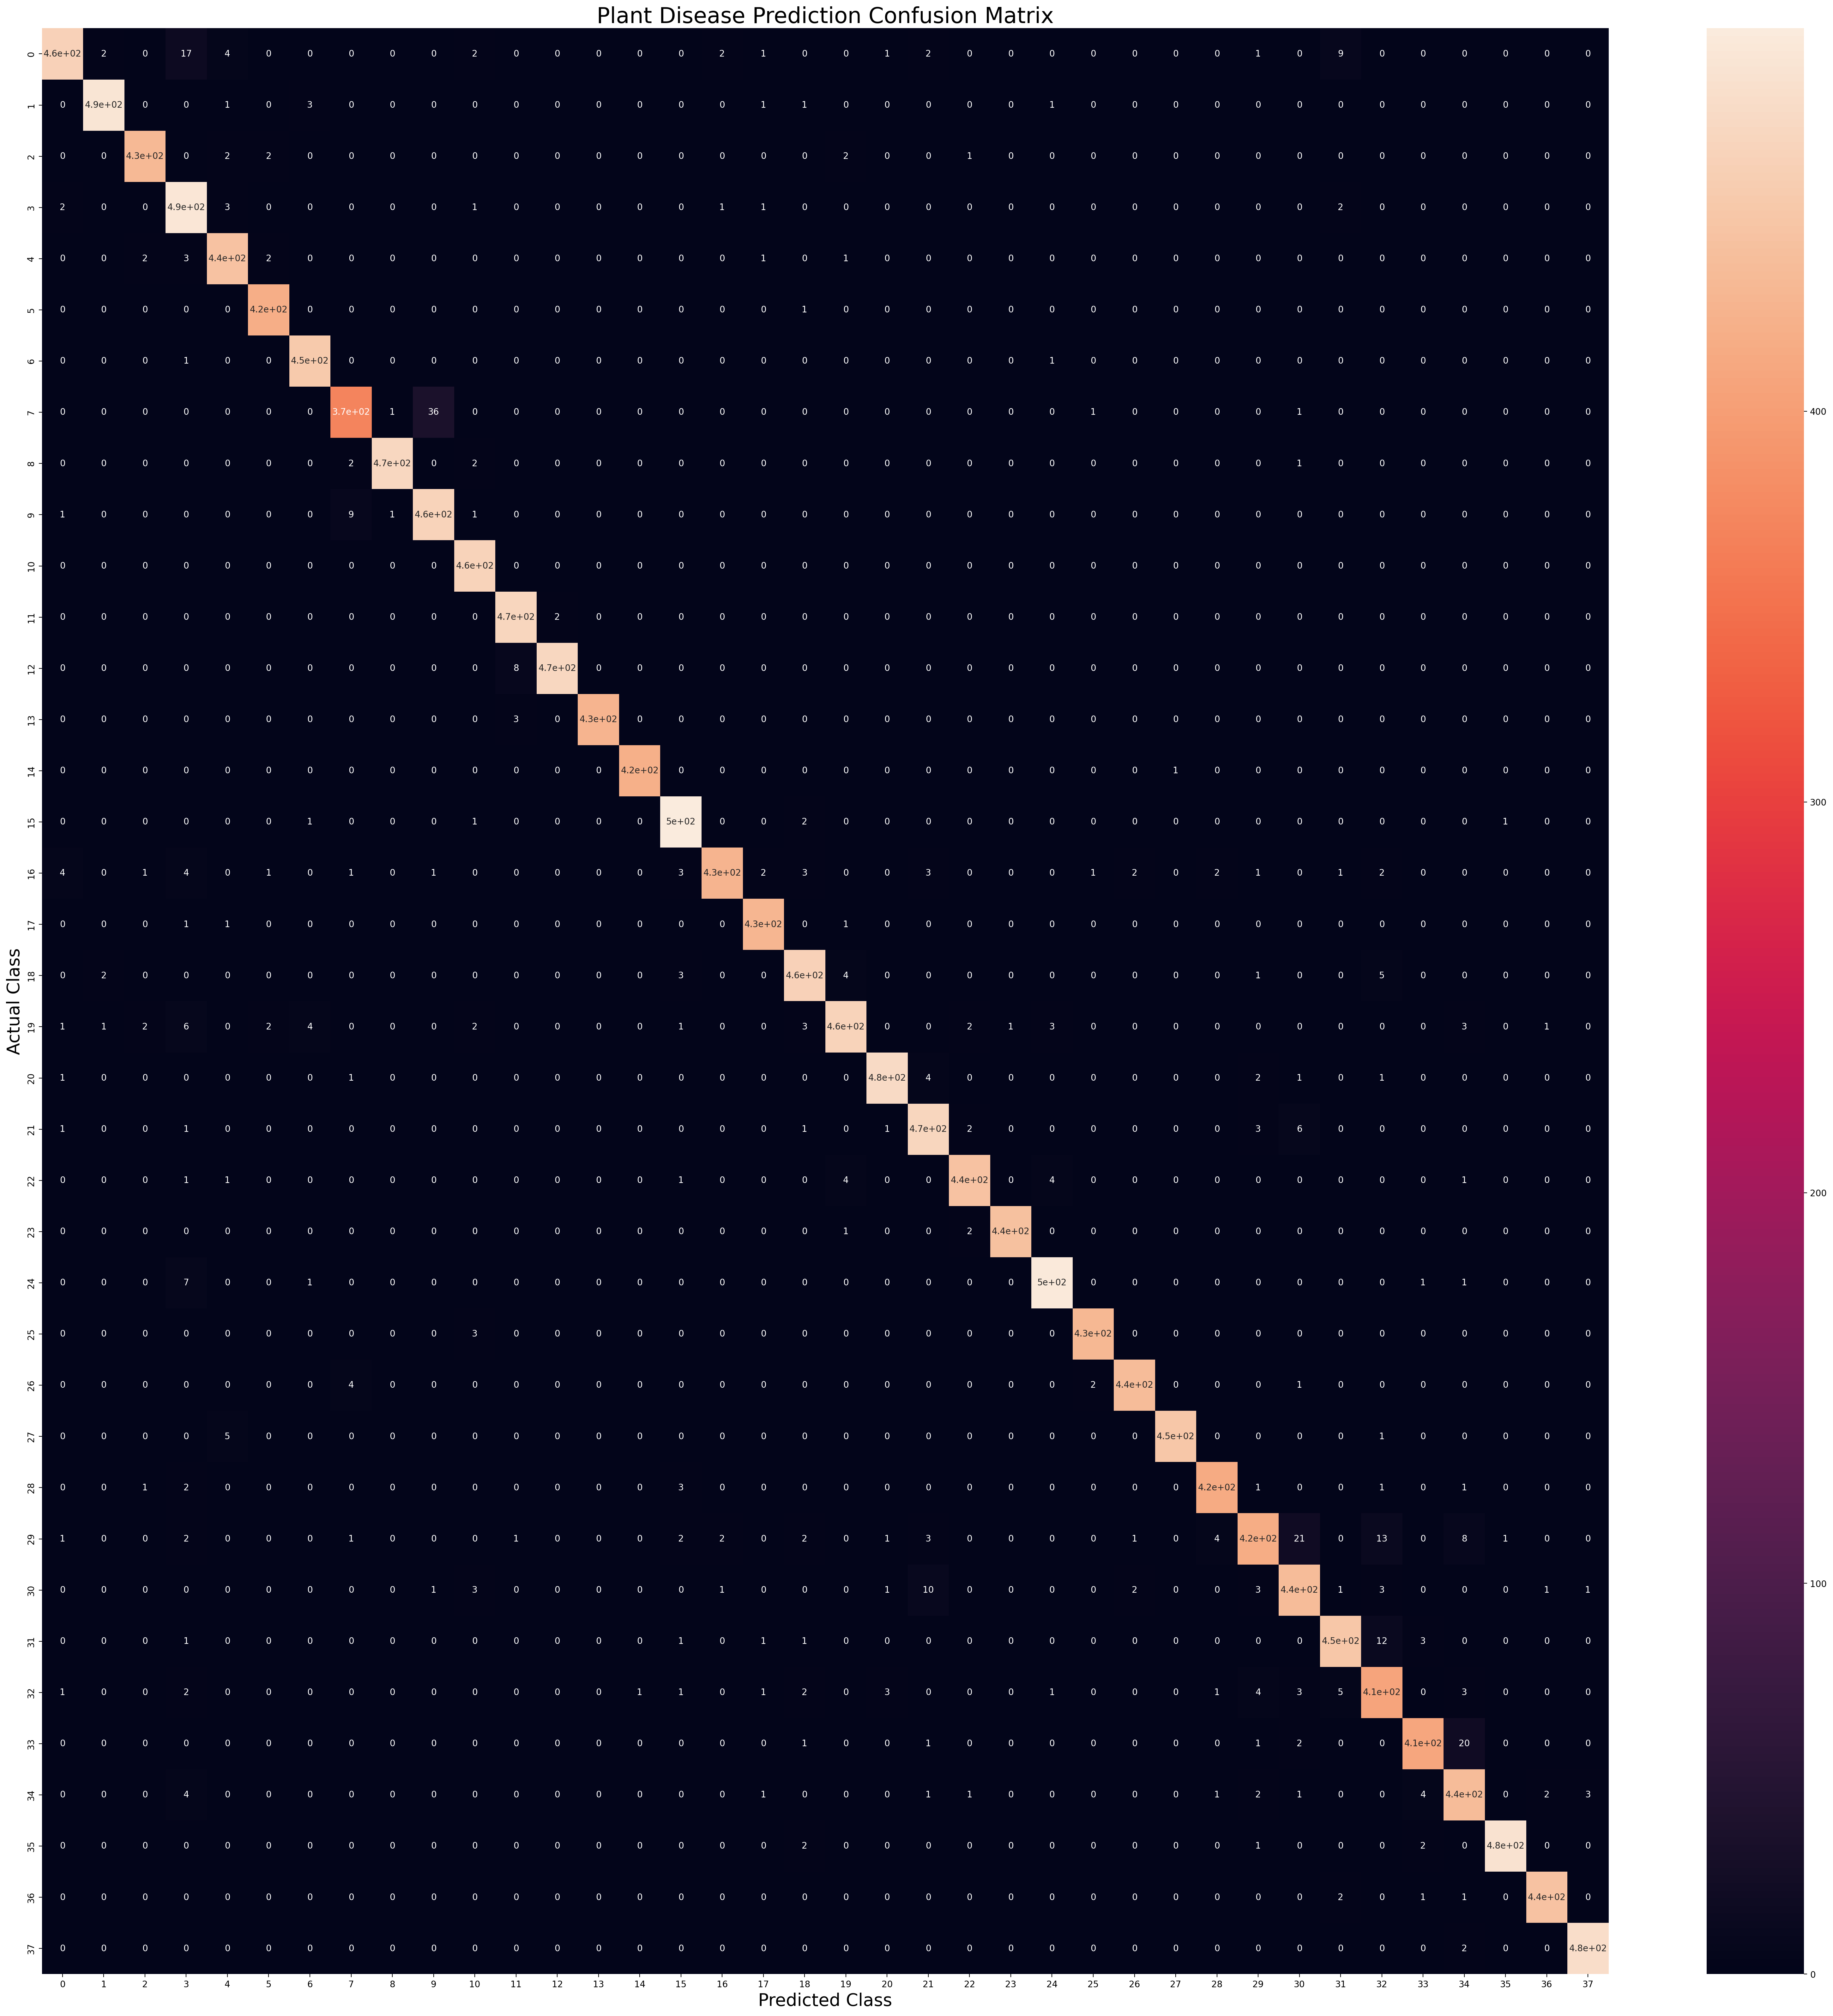

In [ ]:
plt.figure(figsize=(40,40),dpi=200)
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Loading the Model
model  = tf.keras.models.load_model('trained_model.keras')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [ ]:
!pip install opencv-python

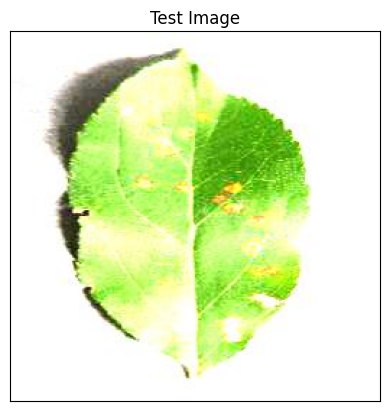

In [ ]:
import cv2
image_path = "/content/dataset/test/test/AppleCedarRust1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Testing the Model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(array([[8.14019945e-12, 5.43361259e-11, 1.00000000e+00, 1.80446040e-11,
         1.98842498e-09, 1.81728677e-09, 1.07037134e-13, 3.97623358e-11,
         6.78600922e-16, 3.85650415e-13, 7.79460166e-17, 2.24906500e-11,
         4.11924347e-13, 1.59529277e-13, 2.04287386e-11, 9.23065999e-11,
         2.39828088e-11, 1.91951511e-12, 8.89207430e-10, 8.48913023e-11,
         1.99933562e-13, 6.16413691e-12, 5.35408566e-12, 8.64424938e-12,
         2.11440742e-13, 1.05784923e-12, 1.84559572e-12, 1.33991083e-14,
         9.02284469e-09, 4.89282170e-10, 3.91701915e-09, 1.06530792e-13,
         4.96709829e-09, 4.60664222e-13, 3.25287730e-09, 1.24767796e-09,
         3.01251038e-11, 2.41635791e-11]], dtype=float32),
 (1, 38))

In [ ]:
result_index = np.argmax(prediction)
result_index

np.int64(2)

In [ ]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

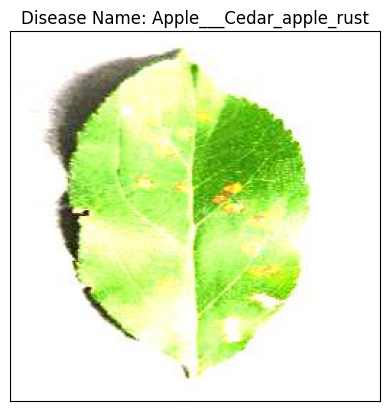

In [ ]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Apple___Cedar_apple_rust'